# Funciones de distribuciones de probabilidad

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Distribución Uniforme
- Básicamente generá números aleatorios que son igual de x probables todos ellos, tienen la misma probabilidad de ocurrir

In [2]:
# Lim. Inferior
a = 0

# Lim. Superior
b = 100

# Támaño de la muestra
n = 1000000

data = np.random.uniform(a, b, n)

(array([100340., 100046., 100350.,  99989., 100255.,  99437.,  99835.,
        100247.,  99795.,  99706.]),
 array([1.52763043e-06, 9.99999509e+00, 1.99999887e+01, 2.99999822e+01,
        3.99999758e+01, 4.99999693e+01, 5.99999629e+01, 6.99999565e+01,
        7.99999500e+01, 8.99999436e+01, 9.99999372e+01]),
 <BarContainer object of 10 artists>)

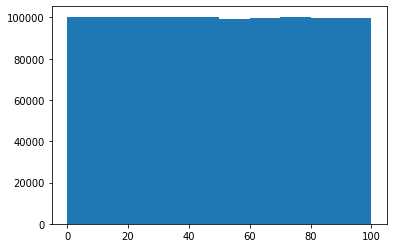

In [3]:
%matplotlib inline
plt.hist(data)

## Distribución Normal

In [4]:
# Generamos una muestra de valores segun una distribución normal
n = 1000000

# Por defecto asume media 0 y desviación estandar 1
data = np.random.randn(n)

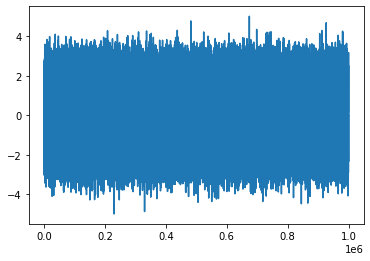

In [5]:
x = range(1,n+1)
plt.plot(x, data)

(array([3.30000e+01, 1.31800e+03, 2.15200e+04, 1.36802e+05, 3.42352e+05,
        3.41000e+05, 1.34769e+05, 2.09040e+04, 1.27500e+03, 2.70000e+01]),
 array([-4.99886853, -3.99785058, -2.99683262, -1.99581467, -0.99479671,
         0.00622124,  1.00723919,  2.00825715,  3.0092751 ,  4.01029306,
         5.01131101]),
 <BarContainer object of 10 artists>)

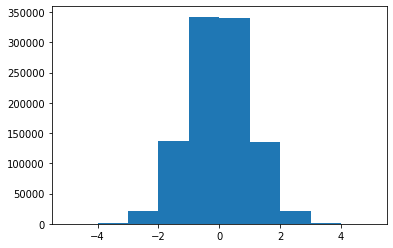

In [6]:
plt.hist(data)

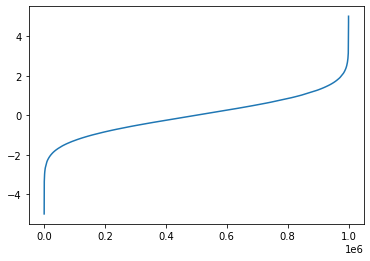

In [7]:
plt.plot(x, sorted(data))

(array([   6.,   74.,  479., 1446., 2706., 2914., 1730.,  539.,   95.,
          11.]),
 array([-4.35499367, -2.41471   , -0.47442633,  1.46585733,  3.406141  ,
         5.34642466,  7.28670833,  9.226992  , 11.16727566, 13.10755933,
        15.04784299]),
 <BarContainer object of 10 artists>)

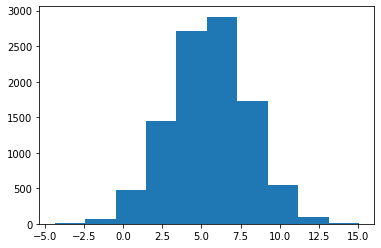

In [8]:
# Mediana
me = 5.5

# Desv. Estandar
std = 2.5

# Distribución
Z_10000 = np.random.randn(10000)

# Z = (x - me) / std => N(0,1), x = me + std * Z
data = me + std * Z_10000

# Gráfico
plt.hist(data)

In [9]:
# Con el segundo parametro, índicamos ka cantidad de colecciones que generá
np.random.randn(5, 2)

array([[ 0.67714832, -0.1681159 ],
       [-0.11107474, -0.2423466 ],
       [-0.22903966,  0.67395962],
       [ 0.73223041,  0.14067691],
       [ 1.3964883 , -1.38260942]])

# Simulación Montecarlo
* Los puntos se considerarán con la ecuación *r^2 = x^2 + y^2* (x e y siendo los catetos que conforman el trinagulo, con la hipotenusa r). Por lo tanto, esta ecuación representa que tam alejado esta un punto del orígen.
    * El círculo que se considerara tiene un radio *r = 1*, por lo tanto cualquier valor que resultante mayor a 1, se deduce que cayó fuera del círculo.
    * De lo anterior se deduce, que si obtenemos un radio *r > 1*, el punto esta fuera del círculo.
* Para la generación de números aleatorios, se condierará una distribución uniforme entre 0 y 1, es decir, dentro del círculo
* Se realizarán un número de lanzamientos al círculo de 100 veces *(n = 100)*
* Para calcular el valor aproximado de pi, se dividira la cantidad de veces que los dardos o puntos estan dentro del circulo, por la cantidad total de dardos tirados. El producto de esta división por 4, debería darnos un valor aproxímado de pi.
* Se ha considerado hacer al menos unas 1000 *(k = 1000)* repeticiones de este experimento, luego pi sera el promedio de los anteriores intentos.


Valor aprox. de pi:  3.14108


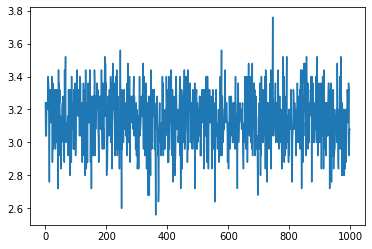

In [11]:
# Número de repeticiones
k = 1000

# Número de Lanzamientos
n = 100

# Valores de pi en cada experimento
pi_values = np.array([])

# Número de repeticiones
for i in range(k):

    # Posiciónes de los dardo 
    x = np.random.uniform(0,1, n)
    y = np.random.uniform(0,1, n)

    # Número de dardos en el circulo
    inCircle = np.sum( np.sqrt( x**2 + y**2 ) <= 1 )

    pi = ( inCircle / n ) * 4
    pi_values = np.append( pi_values, pi )

# Promedio de los valores de pi encontrados
pi_avrg = np.average( pi_values )

print("Valor aprox. de pi: ", pi_avrg)
plt.plot(pi_values)

## Dummy Data Sets

In [20]:
n = 100000
data = pd.DataFrame(
    {
        'A': np.random.randn(n),
        'B': 1.5 + 2.5 * np.random.randn(n),
        'C': np.random.uniform(5, 32, n)
    }
)

data.describe()

,A,B,C
count,100000.000000,100000.000000,100000.000000
mean,-0.001207,1.499144,18.543043
std,1.000664,2.493780,7.798039
min,-4.750081,-9.305955,5.000797
25%,-0.676014,-0.192642,11.800509
50%,-0.002732,1.496712,18.522830
75%,0.673767,3.180882,25.254129
max,4.413705,13.248968,31.999681


In [29]:
data = pd.read_csv("C:/Users/deiby/Documents/curso-ml/datasets/customer-churn-model/Customer Churn Model.txt")

headers = data.columns.values
k = len(headers)

pd.DataFrame(
    {
        'Column Names': headers,
        'A': np.random.randn(k),
        'B': np.random.uniform(0, 1, k)
    },
    index= range(40, 40 + k)
)

,Column Names,A,B
40,State,0.330009,0.820948
41,Account Length,-1.029018,0.326582
42,Area Code,-0.446727,0.599973
43,Phone,-0.190610,0.850314
44,Int'l Plan,-0.400885,0.073434
45,VMail Plan,0.485397,0.349456
46,VMail Message,0.131771,0.113561
47,Day Mins,2.509695,0.682740
48,Day Calls,0.545402,0.834860
49,Day Charge,-0.581543,0.054469
